# HW01 - Question 02

## Load MNIST database

In [2]:
from keras.datasets import mnist
import seaborn as sns

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Database dimensions and size

In [4]:
print(f"Train set dimensions is:\t{X_train[0].shape} with {len(X_train)} elements.")
print(f"Test  set dimensions is:\t{X_test[0].shape} with {len(X_test)} elements.")

Train set dimensions is:	(28, 28) with 60000 elements.
Test  set dimensions is:	(28, 28) with 10000 elements.


## Example of each class

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# a function for display one sample of each class
def display_class_sample(X, y):
  fig_classes, axs_classes = plt.subplots(2, 5)
  fig_classes.set_size_inches(10, 10)
  fig_classes.subplots_adjust(top = 0.4, bottom=0.1, hspace=0.4, wspace=0.4)

  for i in range(10):
    row_idx = int(i / 5)
    col_idx = int(i % 5)

    sample_idx = np.where(y == i)[0][0]

    axs_classes[row_idx, col_idx].imshow(X[sample_idx], cmap='gray')
    axs_classes[row_idx, col_idx].axis('off')
    axs_classes[row_idx, col_idx].set_title(f"Label: {str(y[sample_idx])}")

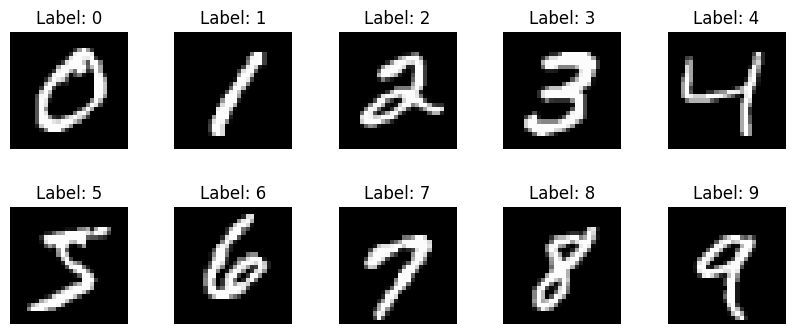

In [7]:
display_class_sample(X_train, y_train)

## Histogram of train and test sets

Text(0.5, 1.0, 'Test Set')

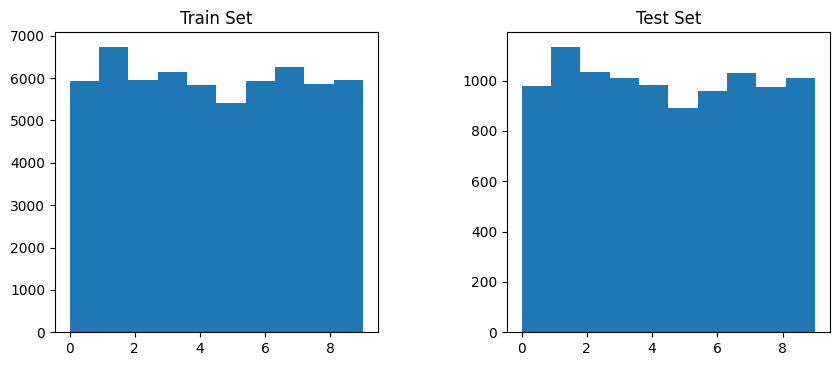

In [6]:
# plot histograms in two subplot

fig_hist, (train_axs, test_axs) = plt.subplots(1, 2)
fig_hist.set_size_inches(10, 10)
fig_hist.subplots_adjust(top = 0.4, bottom=0.1, hspace=0.4, wspace=0.4)

train_axs.hist(y_train)
train_axs.set_title("Train Set")

test_axs.hist(y_test)
test_axs.set_title("Test Set")

# Reshape

In [8]:
# flatten samples into 1-D elements

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

### Dimensions after Reshape

In [9]:
print(f"Train set dimensions is:\t{X_train_reshaped.shape}")
print(f"Test  set dimensions is:\t{X_test_reshaped.shape}")

Train set dimensions is:	(60000, 784)
Test  set dimensions is:	(10000, 784)


## Min-Max Normalization

In [10]:
# Formula: X_norm = (X - X_min) / (X_max - X_min)
# Where 'X_min = 0' and 'X_max = 255'

X_train_norm = X_train_reshaped.astype('float32') / 255
X_test_norm = X_test_reshaped.astype('float32') / 255

### Sample of normalized data

In [11]:
X_train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## One-hot Encoding

In [12]:
from keras.utils import to_categorical

# _oh = One-Hot encoded set
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

### Sample of labels after Encoding

In [13]:
y_train_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building and training network

### Parameters

In [14]:
output_dim = 10 # Number of classes

input_dim = X_train_norm.shape[1] # input of our model = 28*28 (Dim of flat data)

batch_size = 128
nb_epoch = 25 # From Homework data

### functions to plot accuracy and score

In [15]:
def plot_accuracy(histroy):
    # Plot the training accuracy
    sns.set_style("darkgrid")
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

In [16]:
import pandas as pd

def score_table(model, test_set, test_label):
    score = model.evaluate(test_set, test_label, verbose='0')
    df = pd.DataFrame({'Test Score': [score[0]], 'Test Accuracy': [score[1]]})
    print('\n\n', df, '\n\n')

### Training

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Learning rate before first fit: 6e-05
Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/2

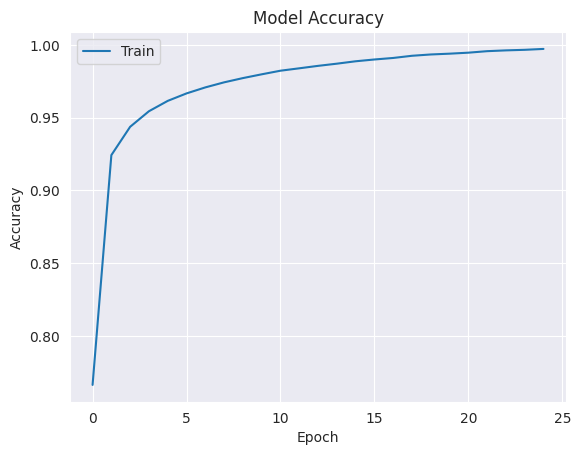

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(Dense(output_dim, activation='softmax'))

print(model.summary())

optimizer = keras.optimizers.Adam(learning_rate=6e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

history = model.fit(X_train_norm, y_train_oh, batch_size=batch_size, epochs=nb_epoch, verbose='0')

score_table(model, X_test_norm, y_test_oh)

plot_accuracy(history)

## FGSM adversarial attack

### Implementation

In [18]:
#for simplicity we can use tensorflow in this section
import tensorflow as tf

# Now we implement the FGSM attack based-on interface given in Homework

def fgsm(model, X, y, epsilon):
  # Convert X and y to TensorFlow tensors
  X_tensor = tf.convert_to_tensor(X)
  y_tensor = tf.convert_to_tensor(y)

  # Create a TensorFlow Variable to hold the perturbation (delta)
  delta = tf.Variable(tf.zeros_like(X_tensor), trainable=True)

  # Calculate the model loss
  with tf.GradientTape() as tape:
      # Forward pass to compute the logits
      logits = model(X_tensor + delta, training=False)
      loss = keras.losses.categorical_crossentropy(y_tensor, logits)
      loss = tf.reduce_mean(loss)

  # Calculate the gradient of the loss with respect to the perturbation (delta)
  grad = tape.gradient(loss, delta)

  # Generate adversarial examples by perturbing the input data in the direction of the gradient
  delta.assign(tf.sign(grad))

  return epsilon * delta.numpy()

### Results

In [91]:
# decode one hot to integer
def onehot_decode(y_oh):
  y_rnd = np.round(y_oh).astype(int)
  return np.array([np.argmax(y, axis=None, out=None) for y in y_rnd])

# display first n samples of dataset with real and predicted labels
def display_n_sample(n, X, y_real, y_predicted):
  num_of_rows = int(n / 5)
  num_of_rows = num_of_rows+1 if int(n % 5) > 0 else num_of_rows

  fig_classes, axs_classes = plt.subplots(num_of_rows, 5)
  fig_classes.set_size_inches(20, 20)
  fig_classes.subplots_adjust(top = 0.4, bottom=0.1, hspace=0.4, wspace=0.1)

  for i in range(n):
    row_idx = int(i / 5)
    col_idx = int(i % 5)

    title_color = 'green' if y_predicted[i] == y_real[i] else 'red'

    axs_classes[row_idx, col_idx].imshow(X[i], cmap='gray')
    axs_classes[row_idx, col_idx].axis('off')
    axs_classes[row_idx, col_idx].set_title(f"Real: {str(y_real[i])}\nPredicted: {str(y_predicted[i])}", color=title_color)

def evaluate_attack(y_real, y_predicted):
  total_num_samples = len(y_real)
  errors=0
  for i in range(0, total_num_samples):
    errors = (errors + 1) if y_real[i] != y_predicted[i] else errors

  percentage = (errors / total_num_samples) * 100

  print(f"Attack succeeded in {percentage}% of cases")
  return (errors / total_num_samples)

In [88]:
fgsm_epsilon = 0.1
delta = fgsm(model, X_train_norm, y_train_oh, fgsm_epsilon)

# Calculate input with noise
X_fgsm_adv = X_train_norm + delta

y_fgsm_adv = model.predict(X_fgsm_adv)

1875/1875 [==============================] - 9s 5ms/step


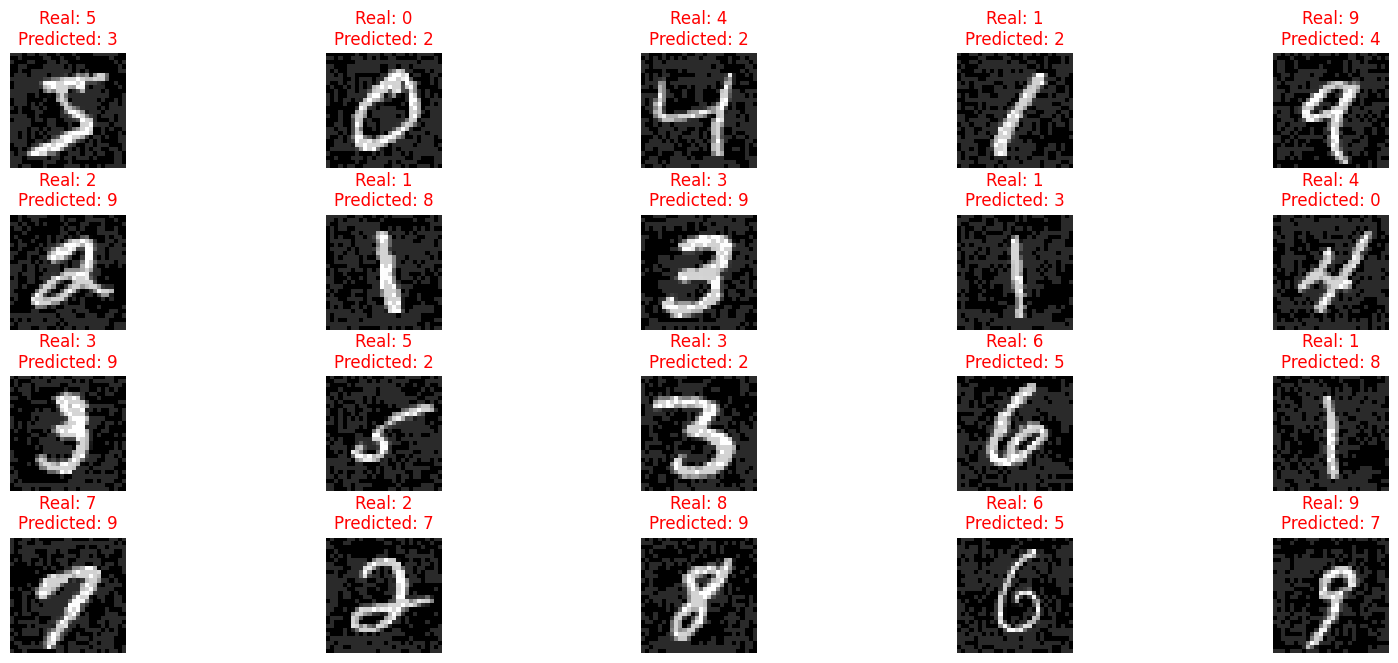

In [89]:
# Reshape back to (28, 28)
X_fgsm_adv = X_fgsm_adv.reshape((60000, 28, 28))

# Decode One-Hot
y_fgsm_adv_ohr = onehot_decode(y_fgsm_adv)

# display first 20 samples
display_n_sample(20, X_fgsm_adv, y_train, y_fgsm_adv_ohr)

### Attack success percentage

In [90]:
evaluate_attack(y_train, y_fgsm_adv_ohr)

Attack succeeded in 98.53666666666666% of cases


### Error/Epsilon Graph

In [109]:
# Here we calculte error for various epsilon and display on plot

fgsm_eps_list = [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,
                 0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,
                 0.085,0.09,0.095,0.1]
fgsm_err_list = []

for ep in fgsm_eps_list:
  print(f"Calculating error for epsilon={ep}")
  delta_e = fgsm(model, X_train_norm, y_train_oh, ep)
  X_fgsm_adv_e = X_train_norm + delta_e
  y_fgsm_adv_e = model.predict(X_fgsm_adv_e)
  y_fgsm_adv_e_ohr = onehot_decode(y_fgsm_adv_e)
  err = evaluate_attack(y_train, y_fgsm_adv_e_ohr)
  fgsm_err_list.append(err)

Calculating error for epsilon=0.005
1875/1875 [==============================] - 5s 2ms/step
Attack succeeded in 2.1016666666666666% of cases
Calculating error for epsilon=0.01
1875/1875 [==============================] - 6s 3ms/step
Attack succeeded in 8.459999999999999% of cases
Calculating error for epsilon=0.015
1875/1875 [==============================] - 5s 3ms/step
Attack succeeded in 19.151666666666667% of cases
Calculating error for epsilon=0.02
1875/1875 [==============================] - 6s 3ms/step
Attack succeeded in 34.17666666666667% of cases
Calculating error for epsilon=0.025
1875/1875 [==============================] - 6s 3ms/step
Attack succeeded in 51.75333333333333% of cases
Calculating error for epsilon=0.03
1875/1875 [==============================] - 6s 3ms/step
Attack succeeded in 66.955% of cases
Calculating error for epsilon=0.035
1875/1875 [==============================] - 6s 3ms/step
Attack succeeded in 78.13833333333334% of cases
Calculating error for eps

Text(0.5, 1.0, 'FGSM attack Error / Epsilon')

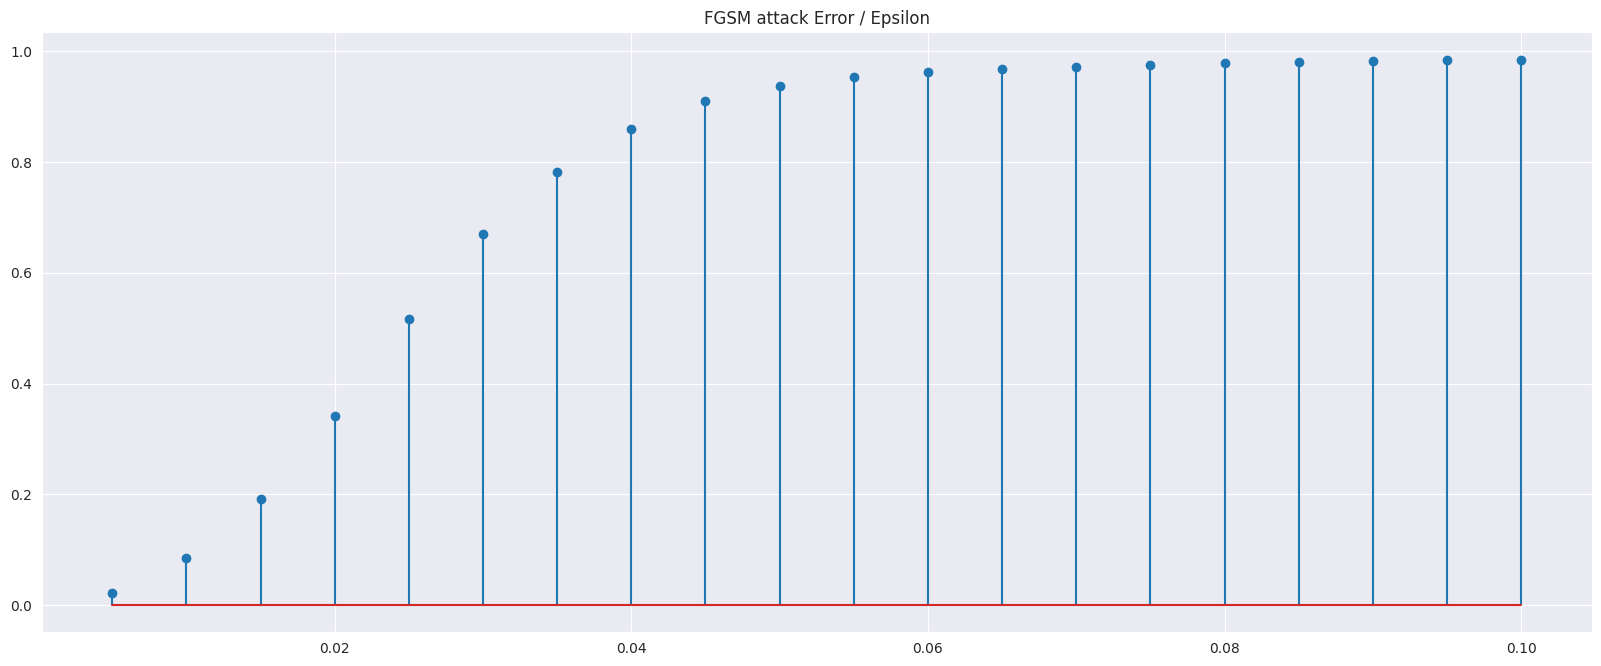

In [110]:
# display on plot
fig_eps_err, axs_eps_err = plt.subplots(1, 1)
fig_eps_err.set_size_inches(20, 20)
fig_eps_err.subplots_adjust(top = 0.4, bottom=0.1, hspace=0.4, wspace=0.1)

axs_eps_err.stem(fgsm_eps_list, fgsm_err_list)
axs_eps_err.set_title("FGSM attack Error / Epsilon")

## PGD adversarial attack

### Implementation

In [34]:
# In homework there was no interface specified for PGD attack so for simplicity
# just wrote a function to calculate perturbation and from there calculated
# adversarial input for model resulted in PGD attack instead of just returning
# perturbation

def get_pgd_adv_inp(model, x, y, epsilon, alpha, num_iter):
    # Create a copy of the input to apply perturbations
    x_adv = tf.identity(x)

    for _ in range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv, training=False)
            # as we used one-hot so we use categorical_crossentropy
            loss = tf.keras.losses.categorical_crossentropy(y, logits)

        # Compute gradients of the loss with respect to the input
        gradients = tape.gradient(loss, x_adv)

        # Compute perturbation (PGD step)
        perturbation = tf.sign(gradients)
        perturbation *= alpha

        # Apply perturbation to the input and clip to ensure L-inf norm <= epsilon
        # and also we used min-max normaliarion so we just clip at 0.0 and 1.0
        x_adv = tf.clip_by_value(x_adv + perturbation, 0.0, 1.0)
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0.0, 0.1)

    return x_adv.numpy()

### Results

In [79]:
# define parameters for attack
pgd_epsilon = 0.1
pgd_alpha = 0.001
pgd_iteration = 15

# okay we know calculate adversarial data
X_pgd_adv = get_pgd_adv_inp(model, X_train_norm, y_train_oh, pgd_epsilon, pgd_alpha, pgd_iteration)

1875/1875 [==============================] - 5s 3ms/step


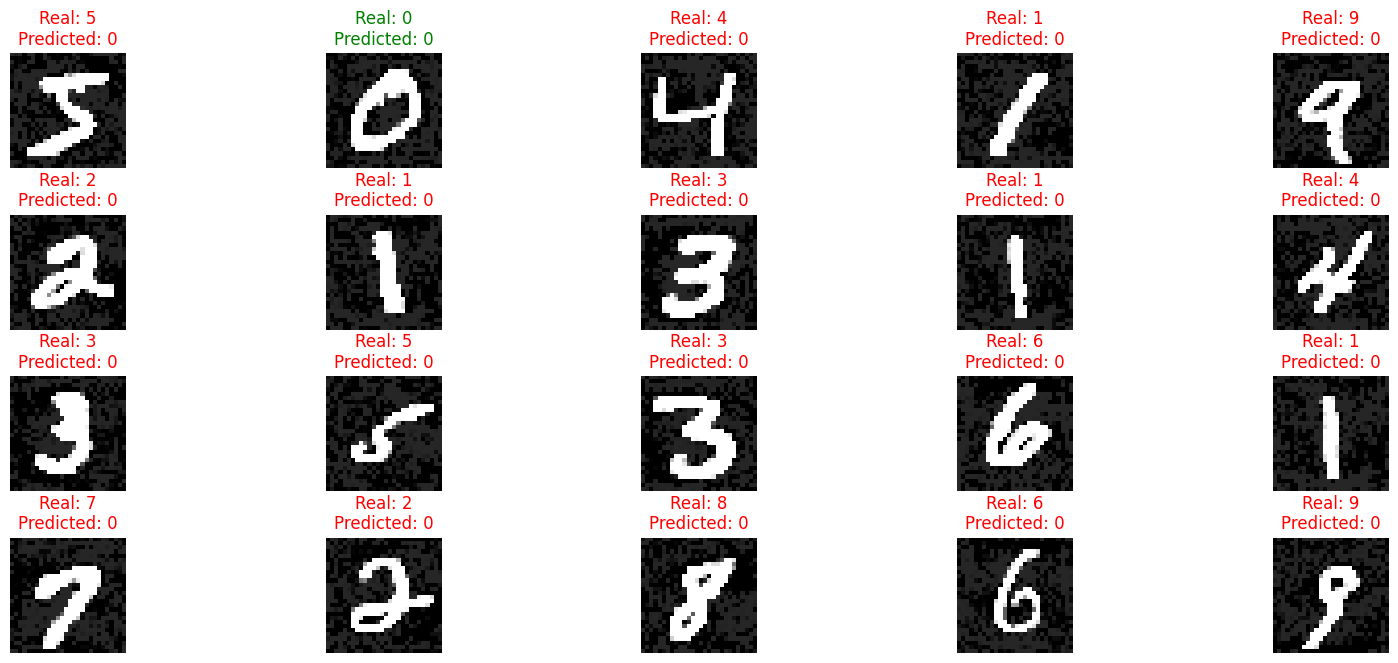

In [80]:
# Predict using model
y_pgd_adv = model.predict(X_pgd_adv)

# Reshape back to (28, 28)
X_pgd_adv = X_pgd_adv.reshape((60000, 28, 28))

# Decode One-Hot
y_pgd_adv_ohr = onehot_decode(y_pgd_adv)

# display first 20 samples
display_n_sample(20, X_pgd_adv, y_train, y_pgd_adv_ohr)

### Attack success percentage

In [81]:
evaluate_attack(y_train, y_pgd_adv_ohr)

Attack succeeded in 90.655% of cases
